<a href="https://colab.research.google.com/github/clayton-summitt/DEV-NEW-PYTHON-PRECOURSE/blob/master/Clayton_sunnitt_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [51]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [52]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [53]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [54]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:
  
Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

When the max number of components k = 1,the fraction for each component is 0.164 
When the max number of components k = 2,the fraction for each component is 0.2972 
When the max number of components k = 3,the fraction for each component is 0.39890000000000003 
When the max number of components k = 4,the fraction for each component is 0.46950000000000003 
When the max number of components k = 5,the fraction for each component is 0.5082 
When the max number of components k = 10,the fraction for each component is 0.6521 
When the max number of components k = 20,the fraction for each component is 0.8087 
When the max number of components k = 30,the fraction for each component is 0.8984000000000001 
When the max number of components k = 40,the fraction for each component is 0.9508 
When the max number of components k = 50,the fraction for each component is 0.9821 


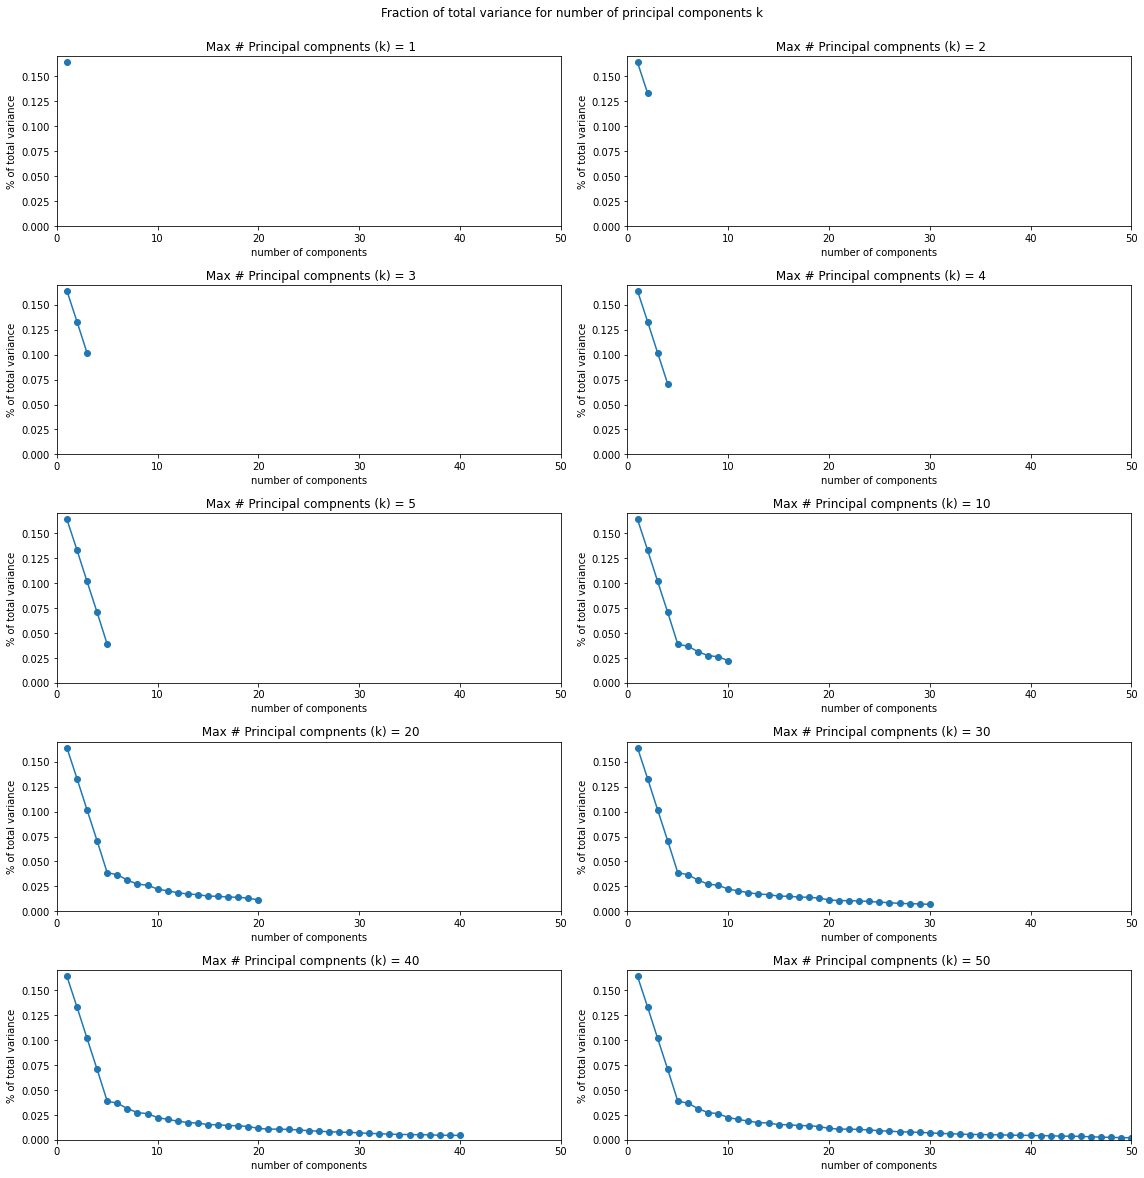

In [55]:
def P1():

### STUDENT START ###
#create list of k principal components
  k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
#create list of to keep track of  fraction of total variance   
  variance_ratios =[]
#create list of x values for plotting against  
  xs =[]
  for val in k:
    # x is the list of values for plotting purposes only
    x = list(range(1,val +1))
    xs.append(x)
    #PCA analysis
    pca = PCA(n_components= val)
    pca.fit(train_data)
    #append the numpy array of explained_variance ratio_ into list
    variance_ratios.append(np. around(pca.explained_variance_ratio_,4))
 # print(variance_ratios)
  for i,elem in enumerate(variance_ratios):
    print("When the max number of components k = {},the fraction for each component is {} ".format(k[i], np.sum(elem) ))
  


  plt.rcParams['figure.figsize'] = [16, 16]
# plt.suptitle("Fraction of total variance for number of principal components k", y =1.02)
  for i in range(0,10):
    #choose subplot location 
    plt.subplot(5, 2, i+1)
    #require all plots have the same scale on x axis
    plt.xlim(0,50)
    plt.ylim(0.0,0.17)
    #plot explained_variacne_ratio
    plt.plot(xs[i],variance_ratios[i],marker = 'o')
    #give each plot a title
    plt.title( ' Max # Principal compnents (k) = %i' %k[i])
    plt.xlabel("number of components")
    plt.ylabel("% of total variance")
    #produce space between subplots so axis labels and titles do not overlap
    plt.tight_layout(h_pad= 1.2)

  plt.suptitle("Fraction of total variance for number of principal components k", y =1.02)
  plt.show()
### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

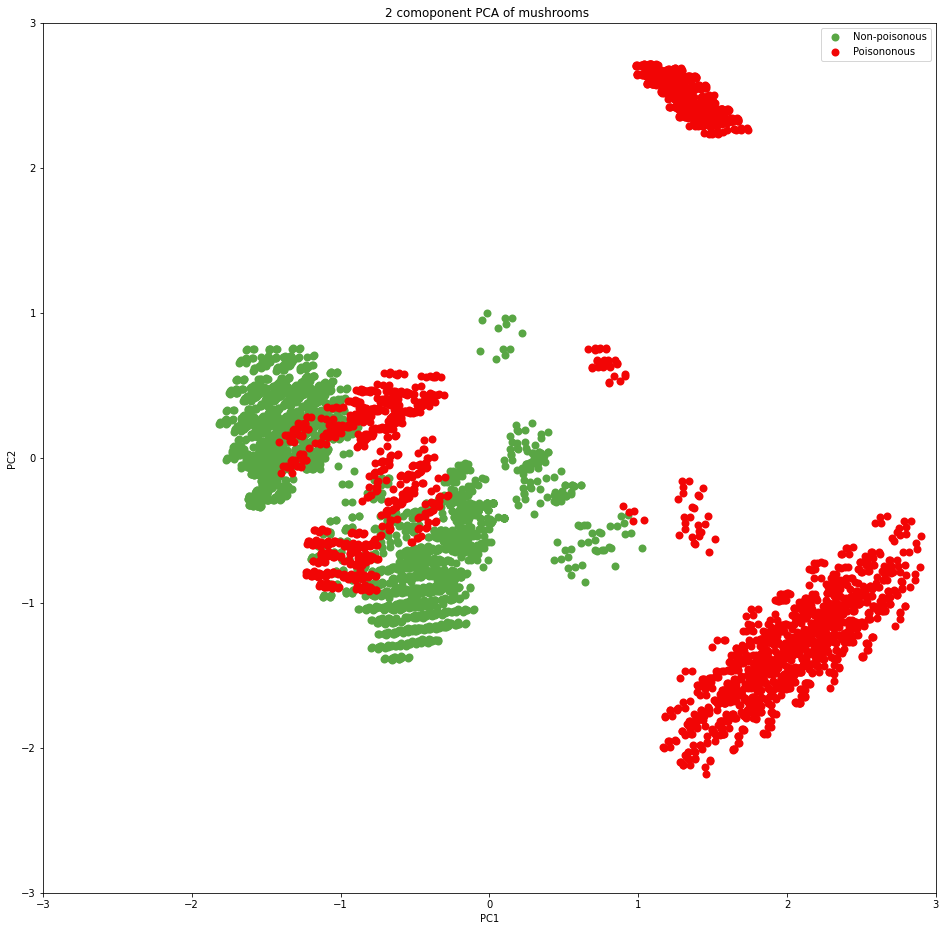

In [56]:
def P2():

### STUDENT START ###
  plt.rcParams['figure.figsize'] = [16, 16]
  pca = PCA(n_components= 2)
  pca_compnents_train_data = pca.fit_transform(train_data)

  colors =  ["#59A644","#F20505"] #green and red 
  label_names = ["Non-poisonous","Poisononous"]

  for color, i, target_name in zip(colors, [0, 1], label_names):
      x = pca_compnents_train_data[train_labels == i, 0],
      y = pca_compnents_train_data[train_labels == i, 1]
      plt.scatter(x,y, color=color, lw=2, label=target_name)
  plt.xlim(-3,3)
  plt.ylim(-3,3)
  plt.legend()

  plt.title('2 comoponent PCA of mushrooms ')
  plt.xlabel('PC1')
  plt.ylabel('PC2')


  plt.show()

### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

In [57]:
'''helper functions'''
def get_max_distance(dist_matrix, groups, idx):
  return dist_matrix[groups==idx][:,idx].max()



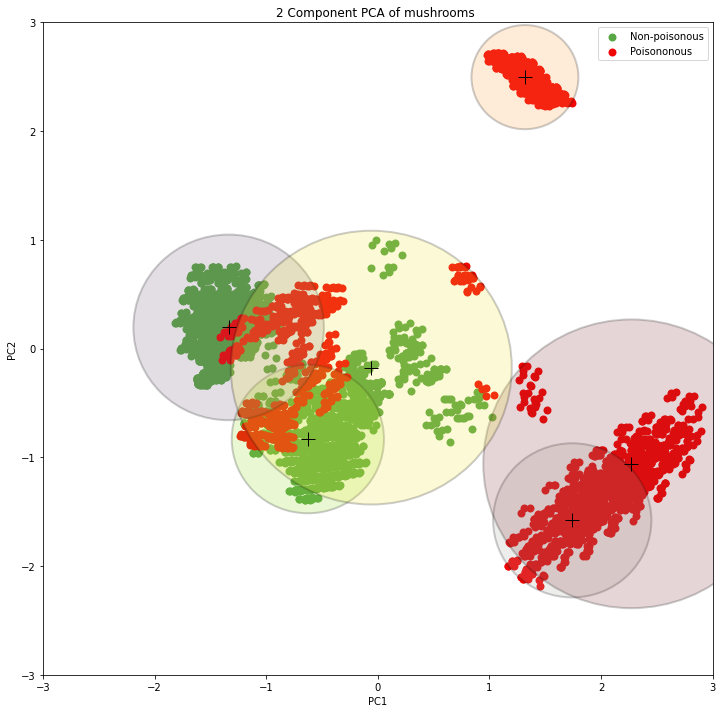

In [58]:
def P3():

### STUDENT START ###
  plt.rcParams['figure.figsize'] = [12, 12]
  pca = PCA(n_components= 2)
  pca_compnents_train_data = pca.fit_transform(train_data)
  model = KMeans(n_clusters=6).fit(pca_compnents_train_data)




  colors =  ["#59A644","#F20505"] #green and red 
  label_names = ["Non-poisonous","Poisononous"]
  dist_center  = model.transform(pca_compnents_train_data)
  groups = model.predict(pca_compnents_train_data)
  radii = []
  groupings = list(np.unique(groups))
  for group in groupings:
    radii.append(get_max_distance(dist_center,groups,group) )
  #model.cluster_centers_

  for color, i, target_name in zip(colors, [0, 1], label_names):
      x = pca_compnents_train_data[train_labels == i, 0],
      y = pca_compnents_train_data[train_labels == i, 1]
      plt.scatter(x,y, color=color, lw=2, label=target_name)
  plt.xlim(-3,3)
  plt.ylim(-3,3)

  circle_colors = ["#93DE23","#FEA443", "#705E78","#A5AAA3", "#812F33", "#F2E635","#9A5A8F"]

  for idx,rad in enumerate(radii):
    
    center = (model.cluster_centers_[idx][0],model.cluster_centers_[idx][1])
    circle = plt.Circle(center, radius = rad, color=circle_colors[idx], ec ="black",linestyle = '-', linewidth =2,alpha = 0.2)
    plt.gca().add_artist(circle)
  plt.legend()

  plt.title('2 Component PCA of mushrooms ')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  x_centroids = model.cluster_centers_[:,0]
  y_centroids = model.cluster_centers_[:,1]
  plt.plot(x_centroids, y_centroids ,"k+",markersize = 14)

  plt.show()



### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

In [59]:
'''helper functions'''
def get_gmm_clf(num_components,cov_matrix_type):
  return GaussianMixture(n_components=num_components, covariance_type=cov_matrix_type, random_state=12345)

def plot_gmm_clf(gm_clf,pca):
  x = np.linspace(-3.5, 3.5)
  y = np.linspace(-3.5, 3.5)
  X, Y = np.meshgrid(x, y)
  XX = np.array([X.ravel(), Y.ravel()]).T
  Z = -gm_clf.score_samples(XX)
  Z = Z.reshape(X.shape)

  CS = plt.contour(X, Y, Z)
  CB = plt.colorbar(CS, shrink=0.8, extend='both')
  plt.scatter(pca[:, 0], pca[:, 1],.9)
  
  #plt.axis('tight')
  

    

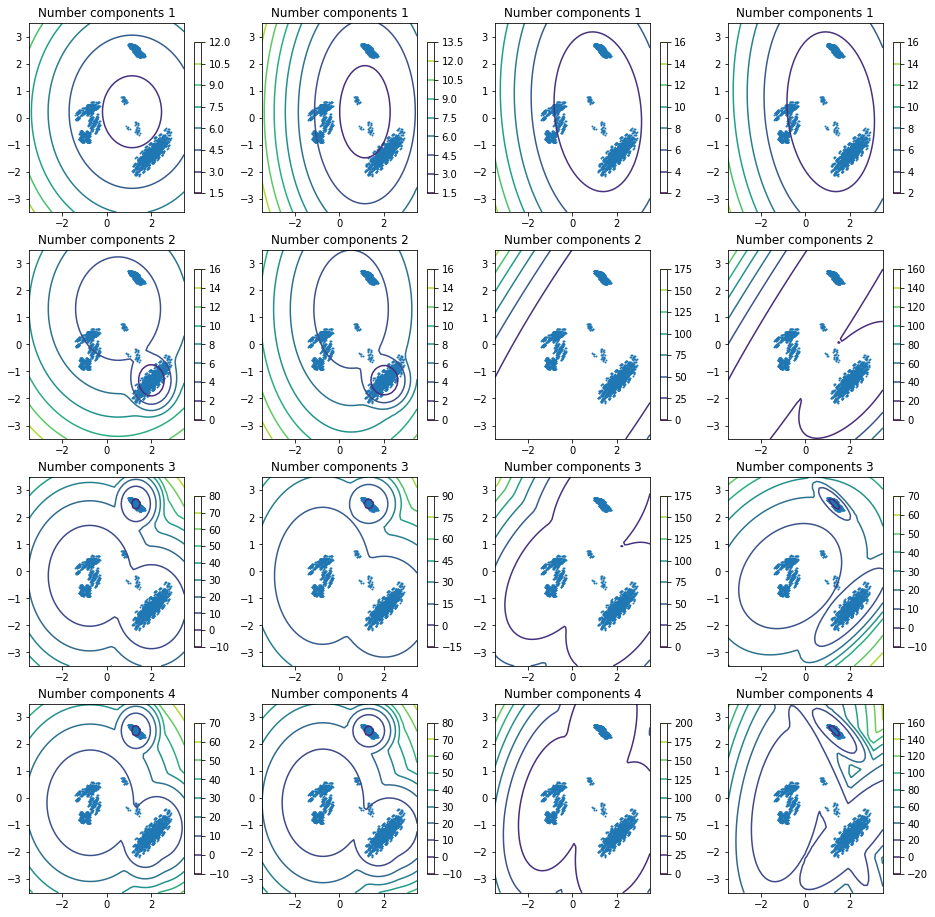

In [60]:
def P4():

### STUDENT START ###
  pca = PCA(n_components= 2)
  pca_compnents_train_data = pca.fit_transform(train_data)
  posionous_pca = pca_compnents_train_data[train_labels == 1]
  plt.rcParams['figure.figsize'] = [16, 16]

  num_components = [1,2,3,4]
  cov_matrix_type =['spherical', 'diag', 'tied', 'full']


  # gm_clf = get_gmm_clf(num_components[0],cov_matrix_type[0])
  # gm_clf.fit(posionous_pca)

  #plot_gmm_clf(gm_clf,posionous_pca)
  index =1

  for j,elem in enumerate(num_components):
    for i,covmat in enumerate(cov_matrix_type):
    
      #choose subplot location 
      
      plt.subplot(4, 4, index)
      #generate model
      gm_clf = get_gmm_clf(elem,covmat)
      gm_clf.fit(posionous_pca)


      plot_gmm_clf(gm_clf,posionous_pca)
      plt.title("Number components %i" %num_components[j])
      index+=1

  plt.show()
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [61]:
def P5():

### STUDENT START ###
  pca = PCA(n_components= 2)
  #fit and transform both train and test data
  pca_components_train_data = pca.fit_transform(train_data)
  pca_components_test = pca.fit_transform(test_data)
  #select principal components for Positive and Negative labels in training data
  poisonous_pca = pca_components_train_data[train_labels == 1]
  non_poison_pca = pca_components_train_data[train_labels== 0]
 

  

  #fit poisonous mushroooms (+) 
  pos_gm_clf = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
  pos_gm_clf.fit(poisonous_pca)
  #fit non-posionous mushrooms (-)
  non_pos_clf = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
  non_pos_clf.fit(non_poison_pca)

  #predict posionous, if the score_sample for the posionous gaussian mixture model 
  #then the value should be 1 else 0

  predicted_posionous = (pos_gm_clf.score_samples(pca_components_test) >= 
                        non_pos_clf.score_samples(pca_components_test)).astype(int)   
  #if the predicted posoinous label matches the test label
  #the value should be 1 else zero
  correct = (predicted_posionous == test_labels).astype(int)
  #sum up the number of correct and divide by total
  accuracy = np.sum(correct)/correct.shape[0]


  print ("The accuracy of this apporach is {}".format(accuracy    ))
### STUDENT END ###

P5()

The accuracy of this apporach is 0.5088967971530249


In [61]:
np.exp(-1),np.exp(0),np.exp(2)

### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [85]:
#def P6():

### STUDENT START ###
pca = PCA(n_components= 2)
#fit and transform both train and test data
pca_components_train_data = pca.fit_transform(train_data)
pca_components_test = pca.fit_transform(test_data)
#select principal components for Positive and Negative labels in training data
# poisonous_pca = pca_components_train_data[train_labels == 1]
# non_poison_pca = pca_components_train_data[train_labels== 0]


cov_matrix_type =['spherical', 'diag', 'tied', 'full'] 

  #fit poisonous mushroooms (+) 
pos_gm_clf = GaussianMixture(n_components=2, covariance_type='diag', random_state=12345)
pos_gm_clf.fit(pca_components_train_data)
pos_gm_clf.means_.shape, pos_gm_clf.covariances_.shape, pos_gm_clf.weights_.shape
### STUDENT END ###

#P6()

((2, 2), (2, 2), (2,))